Langkah-langkah pembuatan kodingan Fuzzy

# Import Library

Library yang digunakan antara lain:
*   pandas
*   matplotlib.pyplot





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Panggil Dataset

Dataset yang digunakan adalah dataset penghasilan dan pengeluaran dari orangtua mahasiswa, kalian diminta untuk melakukan penyaringan untuk mendapatkan mahasiswa yang layak untuk diberikan bantuan beasiswa

dataset ada pada link ini: https://drive.google.com/file/d/1OqZPEN2m_igflKLzO7w4EFb9717b_jj9/view?usp=sharing

code untuk mendownload dataset: 
`!gdown --id 1OqZPEN2m_igflKLzO7w4EFb9717b_jj9`

salah satu cara untuk membaca file excel: 
`df = pd.read_excel('nama_file.xlsx')`



In [ ]:
!gdown --id 1OqZPEN2m_igflKLzO7w4EFb9717b_jj9

df = pd.read_excel('./Mahasiswa.xlsx')
df

Downloading...
From: https://drive.google.com/uc?id=1OqZPEN2m_igflKLzO7w4EFb9717b_jj9
To: /content/Mahasiswa.xlsx.xls
100% 32.3k/32.3k [00:00<00:00, 59.5MB/s]


,Id,Penghasilan,Pengeluaran
0,1,18.76,9.68
1,2,8.35,4.52
2,3,17.03,10.11
3,4,8.23,9.25
4,5,16.89,6.99
...,...,...,...
95,96,17.31,10.00
96,97,18.85,9.78
97,98,14.52,10.32
98,99,9.83,10.64


**KELAS MAHASISWA**

In [ ]:
class mahasiswa:
    def __init__(self):
         self.id = 0
         self.penghasilan = 0
         self.pengeluaran = 0
        
         # Fuzzifikasi (Fuzzy Input)
         self.penghasilan_sedikit = -1    # Range Hasil [0, 1]
         self.penghasilan_sedang = -1     # Range Hasil [0, 1]
         self.penghasilan_banyak = -1     # Range Hasil [0, 1]
        
         self.pengeluaran_sedikit = -1    # Range Hasil [0, 1]
         self.pengeluaran_sedang = -1     # Range Hasil [0, 1]
         self.pengeluaran_banyak = -1     # Range Hasil [0, 1]
        
         # Inferensi (Fuzzy Output)
         self.diterima = []               # Menyimpan Semua Kemungkinan Nilai Inferensi yang "Diterima"
         self.dipertimbangkan = []        # Menyimpan Semua Kemungkinan Nilai Inferensi yang "Dipertimbangkan"
         self.ditolak = []                # Menyimpan Semua Kemungkinan Nilai Inferensi yang "Dtitolak"
        
         self.diterima_akhir = 0          # Nilai Terbesar dari list Diterima
         self.dipertimbangkan_akhir = 0   # Nilai Terbesar dari list Dipertimbangkan
         self.ditolak_akhir = 0           # Nilai Terbesar dari list Ditolak
        
         # Defuzzifikasi (Crisp Input)
         self.nilai_akhir = 0
        
    def tampilData(self):
         print('id : {} \n nilai penghasilan: {} \n nilai pengeluaran: {} \n nilai akhir: {} \n   penghasilan_sedikit: {} \n   penghasilan_sedang: {} \n   penghasilan_banyak: {} \n   : {} \n   pengeluaran_sedikit: {} \n   pengeluaran_sedang: {} \n   pengeluaran_banyak: {} \n   persentase diterima: {} \n   persentase dipertimbangkan: {} \n   '.format(self.id, self.penghasilan, self.pengeluaran, self.nilai_akhir, self.penghasilan_sedikit, self.penghasilan_sedang, self.penghasilan_banyak, self.pengeluaran_sedikit, self.pengeluaran_sedang, self.pengeluaran_banyak, self.diterima_akhir, self.dipertimbangkan_akhir, self.ditolak_akhir))

mahasiswa_data  = []

#Masukkan data dari dataframe ke dalam list restoran data
for i in range(len(df)):
      mahasiswa_temp = mahasiswa()
      mahasiswa_temp.id = df.iloc[i][0]
      mahasiswa_temp.penghasilan = df.iloc[i][1]
      mahasiswa_temp.pengeluaran = df.iloc[i][2]
      mahasiswa_data.append(mahasiswa_temp)

# Fuzzification

Pada tugas ini buatlah fungsi fuzzification dengan 3 keanggotaan dengan fungsi trapesium. Keanggotaannya yaitu sedikit, sedang, dan banyak

<Center>Rumus Trapesium:


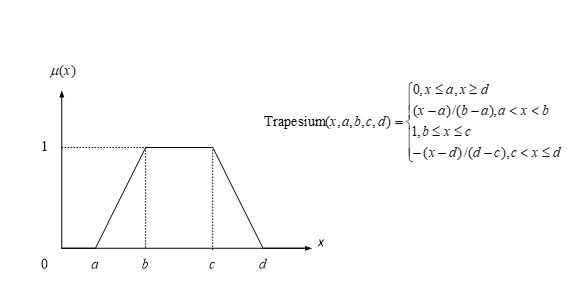

Batas2 yang digunakan yaitu:


## Penghasilan
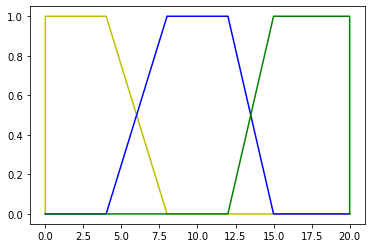
1.   Sedikit `a=0 b=0 c=4 d=8`
2.   Sedang  `a=4 b=8 c=12 d=15`
1.   Banyak `a=12 b=15 c=nilai max d=nilai max`




## Pengeluaran
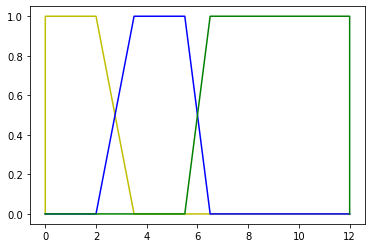
1.   Sedikit `a=0 b=0 c=2 d=3.5`
2.   Sedang  `a=2 b=3.5 c=5.5 d=6.5`
1.   Banyak `a=5.5 b=6.5 c=nilai max d=nilai max`




**FUZZIFIKASI**

In [ ]:
def fuzzifikasi(mahasiswa_temp):
    for i in range (len(mahasiswa_temp)):
        # Perhitungan penghasilan
        if mahasiswa_temp[i].penghasilan >= 0 and mahasiswa_temp[i].penghasilan <= 4:
            mahasiswa_temp[i].penghasilan_sedikit = 1
        elif mahasiswa_temp[i].penghasilan > 4 and mahasiswa_temp[i].penghasilan < 8:
            mahasiswa_temp[i].penghasilan_sedikit = -1*(mahasiswa_temp[i].penghasilan - 8)/(8 - 4)
            mahasiswa_temp[i].penghasilan_sedang = (mahasiswa_temp[i].penghasilan - 4)/(8-4)
        elif mahasiswa_temp[i].penghasilan >= 8 and mahasiswa_temp[i].penghasilan <= 12:
            mahasiswa_temp[i].penghasilan_sedang = 1
        elif mahasiswa_temp[i].penghasilan > 12 and mahasiswa_temp[i].penghasilan < 15:
            mahasiswa_temp[i].penghasilan_sedang = -1*(mahasiswa_temp[i].penghasilan - 15)/(15 - 12)
            mahasiswa_temp[i].penghasilan_banyak = (mahasiswa_temp[i].penghasilan - 12)/(15 - 12)
        elif mahasiswa_temp[i].penghasilan >= 15 and mahasiswa_temp[i].penghasilan <= 20:
            mahasiswa_temp[i].penghasilan_banyak = 1

        #Perhitungan pengeluaran
        if mahasiswa_temp[i].pengeluaran >= 0 and mahasiswa_temp[i].pengeluaran <= 3:
            mahasiswa_temp[i].pengeluaran_sedikit = 1
        elif mahasiswa_temp[i].pengeluaran > 3 and mahasiswa_temp[i].pengeluaran < 4.5:
            mahasiswa_temp[i].pengeluaran_sedikit = -1*(mahasiswa_temp[i].pengeluaran - 4.5)/(4.5 - 3)
            mahasiswa_temp[i].pengeluaran_sedang = (mahasiswa_temp[i].pengeluaran - 3)/(4.5 - 3)
        elif mahasiswa_temp[i].pengeluaran >= 4.5 and mahasiswa_temp[i].pengeluaran <= 7.5:
            mahasiswa_temp[i].pengeluaran_sedang = 1
        elif mahasiswa_temp[i].pengeluaran > 7.5 and mahasiswa_temp[i].pengeluaran < 11:
            mahasiswa_temp[i].pengeluaran_sedang = -1*(mahasiswa_temp[i].pengeluaran - 11)/(11 - 7.5)
            mahasiswa_temp[i].pengeluaran_banyak = (mahasiswa_temp[i].pengeluaran - 7.5)/(11 - 7.5)
        elif mahasiswa_temp[i].pengeluaran >= 11 and mahasiswa_temp[i].pengeluaran <= 12:
            mahasiswa_temp[i].pengeluaran_banyak = 1
            
    return mahasiswa_temp 
# Melakukan Fuzzifikasi terhadap mahasiswa_data
mahasiswa_data = fuzzifikasi(mahasiswa_data)

# Inference

Pada fungsi inference ini akan menghasilkan nilai inference yang akan dibagi menjadi 3 keanggotaan yaitu ditolak, dipertimbangkan, dan diterima

<center> Inference Rule </center>

| Penghasilan \ Pengeluaran  | Sedikit         | Sedang          | Banyak          |   |
|-------------------------------|-----------------|-----------------|-----------------|---|
| Sedikit                       | dipertimbangkan | diterima        | diterima        |   |
| Sedang                        | ditolak         | dipertimbangkan | diterima        |   |
| Banyak                        | ditolak         | ditolak         | dipertimbangkan |   |


In [ ]:
def inferensi(mahasiswa_temp):
    for i in range  (len(mahasiswa_temp)):
      if  mahasiswa_temp[i].penghasilan_sedikit != -1 and  mahasiswa_temp[i].pengeluaran_sedikit != -1:
        mahasiswa_temp[i].dipertimbangkan.append(min(mahasiswa_temp[i].penghasilan_sedikit,mahasiswa_temp[i].pengeluaran_sedikit))
      if  mahasiswa_temp[i].penghasilan_sedikit != -1 and  mahasiswa_temp[i].pengeluaran_sedang != -1:
        mahasiswa_temp[i].diterima.append(min(mahasiswa_temp[i].penghasilan_sedikit,mahasiswa_temp[i].pengeluaran_sedang))
      if  mahasiswa_temp[i].penghasilan_sedikit != -1 and  mahasiswa_temp[i].pengeluaran_banyak != -1:
        mahasiswa_temp[i].diterima.append(min(mahasiswa_temp[i].penghasilan_sedikit,mahasiswa_temp[i].pengeluaran_banyak))

      if  mahasiswa_temp[i].penghasilan_sedang != -1 and  mahasiswa_temp[i].pengeluaran_sedikit != -1:
        mahasiswa_temp[i].ditolak.append(min(mahasiswa_temp[i].penghasilan_sedang,mahasiswa_temp[i].pengeluaran_sedikit))
      if  mahasiswa_temp[i].penghasilan_sedang != -1 and  mahasiswa_temp[i].pengeluaran_sedang != -1:
        mahasiswa_temp[i].dipertimbangkan.append(min(mahasiswa_temp[i].penghasilan_sedang,mahasiswa_temp[i].pengeluaran_sedang))
      if  mahasiswa_temp[i].penghasilan_sedang != -1 and  mahasiswa_temp[i].pengeluaran_banyak != -1:
        mahasiswa_temp[i].diterima.append(min(mahasiswa_temp[i].penghasilan_sedang,mahasiswa_temp[i].pengeluaran_banyak))

      if  mahasiswa_temp[i].penghasilan_banyak != -1 and  mahasiswa_temp[i].pengeluaran_sedikit != -1:
        mahasiswa_temp[i].ditolak.append(min(mahasiswa_temp[i].penghasilan_banyak,mahasiswa_temp[i].pengeluaran_sedikit))
      if  mahasiswa_temp[i].penghasilan_banyak != -1 and  mahasiswa_temp[i].pengeluaran_sedang != -1:
        mahasiswa_temp[i].ditolak.append(min(mahasiswa_temp[i].penghasilan_banyak,mahasiswa_temp[i].pengeluaran_sedang))
      if  mahasiswa_temp[i].penghasilan_banyak != -1 and  mahasiswa_temp[i].pengeluaran_banyak != -1:
        mahasiswa_temp[i].dipertimbangkan.append(min(mahasiswa_temp[i].penghasilan_banyak,mahasiswa_temp[i].pengeluaran_banyak))

      if len(mahasiswa_temp[i].diterima) != 0:
          mahasiswa_temp[i].diterima_akhir = max(mahasiswa_temp[i].diterima)
          
      if len(mahasiswa_temp[i].dipertimbangkan) != 0:
          mahasiswa_temp[i].dipertimbangkan_akhir = max(mahasiswa_temp[i].dipertimbangkan)

      if len(mahasiswa_temp[i].ditolak) != 0:
          mahasiswa_temp[i].ditolak_akhir = max(mahasiswa_temp[i].ditolak)

      
    return mahasiswa_temp

# Melakukan inferensi terhadap mahasiswa_data
mahasiswa_data = inferensi(mahasiswa_data)

# Deffuzification

Menggunakan sugeno model untuk fungsi deffuzzifikasi dengan nilai seperti berikut

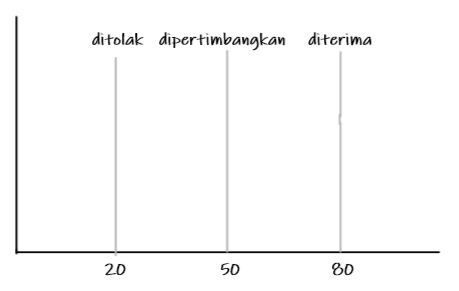

**DEFUZZIFIKASI SUGENO**

In [ ]:
def defuzzifikasi(mhs: mahasiswa) -> mahasiswa:
    mhs.nilai_akhir = ((mhs.diterima_akhir*80) + (mhs.dipertimbangkan_akhir*50) + (mhs.ditolak_akhir*20)) / (mhs.diterima_akhir + mhs.dipertimbangkan_akhir + mhs.ditolak_akhir)
    return mhs
for i in range(len(mahasiswa_data)):
    mahasiswa_data[i] = defuzzifikasi(mahasiswa_data[i])

# Output
tampilkan 10 mahasiswa teratas yang layak mendapatkan bantuan 

In [ ]:
def NilaiAkhirSort(mahasiswa_temp: [mahasiswa()]):
        mahasiswa_temp = sorted(mahasiswa_temp, key=lambda x: x.nilai_akhir, reverse= 1)
        return mahasiswa_temp

# Melakukan sorting terhadap mahasiswa_data
mahasiswa_data = NilaiAkhirSort(mahasiswa_data)

# Memasukkan 10 mahasiswa dengan nilai tertinggi ke dalam list data_akhir
data_akhir = []
for i in range(10):
        data_temp = []
        data_temp.append(mahasiswa_data[i].id)
        data_temp.append(mahasiswa_data[i].nilai_akhir)
        data_temp.append(mahasiswa_data[i].penghasilan)
        data_temp.append(mahasiswa_data[i].pengeluaran)
        data_akhir.append(data_temp)

# Memasukkan list data_akhir ke dalam dataframe df_akhir
df_akhir = pd.DataFrame(data_akhir, columns=['id', 'nilai_akhir', 'penghasilan', 'pengeluaran'])

# Membuat excel dari dataframe df_akhir
df_akhir.to_excel('./peringkat.xls', encoding='xlwt')

df_akhir

,id,nilai_akhir,penghasilan,pengeluaran
0,50.0,80.000000,9.31,11.29
1,49.0,79.400000,9.52,10.93
2,38.0,78.457143,9.94,10.82
3,99.0,76.914286,9.83,10.64
4,41.0,75.350000,4.62,6.88
5,69.0,75.114286,9.86,10.43
6,79.0,74.171429,8.52,10.32
7,94.0,73.228571,9.07,10.21
8,33.0,72.371429,7.03,10.11
9,75.0,71.825000,5.09,7.53
